In [1]:
import pandas as pd
import numpy as np

In [23]:
df = pd.read_csv("NVDA.csv", index_col="Date", parse_dates=["Date"])
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-04-13,260.549988,270.200012,257.000000,269.850006,269.566589,9960200
2020-04-14,275.000000,285.320007,273.890015,283.950012,283.651794,13273700
2020-04-15,277.200012,284.170013,275.380005,280.839996,280.545044,9153700
2020-04-16,287.079987,299.000000,286.549988,294.700012,294.390503,18640500
2020-04-17,298.000000,298.859985,286.940002,292.320007,292.013000,13478000


In [24]:
# 결측치
df[df.isin([np.nan, np.inf, -np.inf]).any(1)]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


<AxesSubplot:xlabel='Date'>

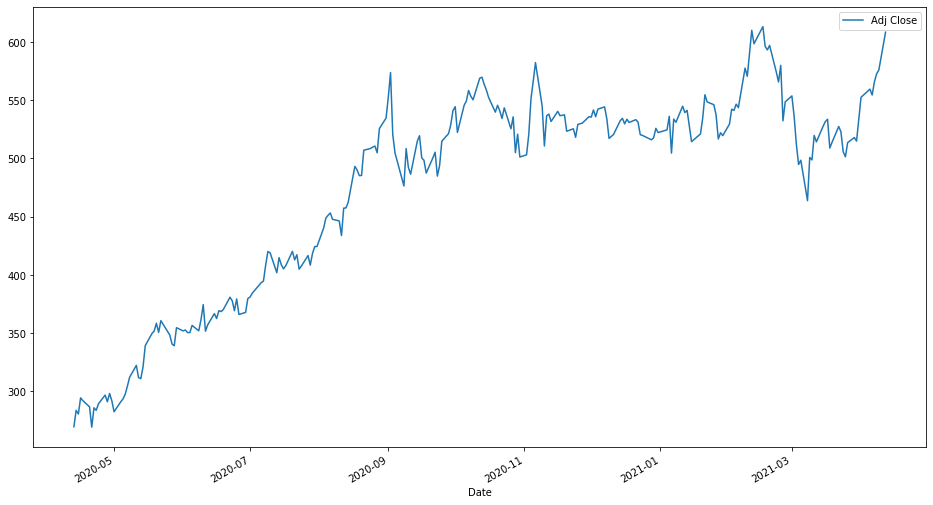

In [25]:
# 데이터 슬라이싱
price_df = df.loc[:,["Adj Close"]].copy()
price_df.plot(figsize=(16,9))

<AxesSubplot:xlabel='Date'>

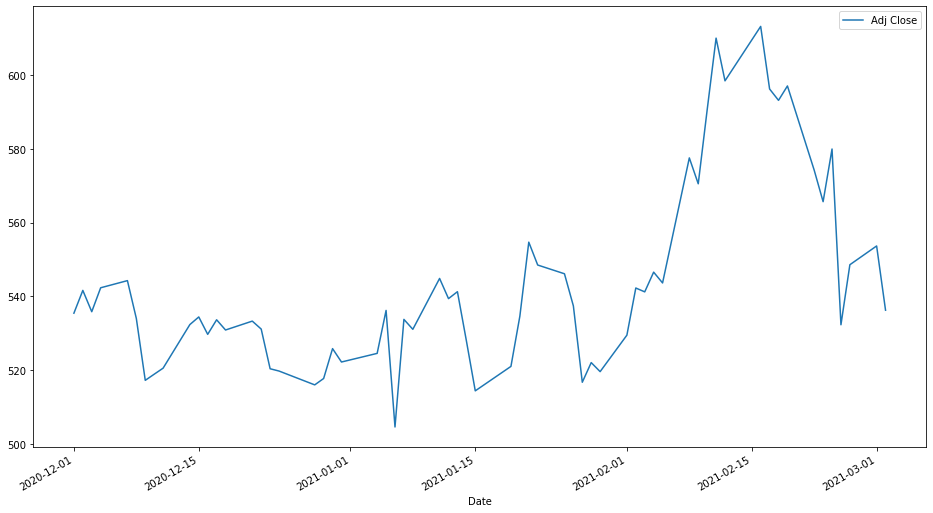

In [26]:
from_date = '2020-12-01'
to_date = '2021-03-02'
price_df.loc[from_date:to_date].plot(figsize=(16,9))

In [27]:
# 일별 수익률 계산
price_df['daily_rtn'] = df['Adj Close'].pct_change()
price_df.head(10)

,Adj Close,daily_rtn
Date,,
2020-04-13,269.566589,NaN
2020-04-14,283.651794,0.052251
2020-04-15,280.545044,-0.010953
2020-04-16,294.390503,0.049352
2020-04-17,292.013000,-0.008076
2020-04-20,286.748535,-0.018028
2020-04-21,269.226990,-0.061104
2020-04-22,285.849487,0.061742
2020-04-23,283.711731,-0.007479


In [28]:
# 수익률 누적곱
price_df['st_rtn'] = (1+price_df['daily_rtn']).cumprod()
price_df.head()

,Adj Close,daily_rtn,st_rtn
Date,,,
2020-04-13,269.566589,NaN,NaN
2020-04-14,283.651794,0.052251,1.052251
2020-04-15,280.545044,-0.010953,1.040726
2020-04-16,294.390503,0.049352,1.092088
2020-04-17,292.013000,-0.008076,1.083269


<AxesSubplot:xlabel='Date'>

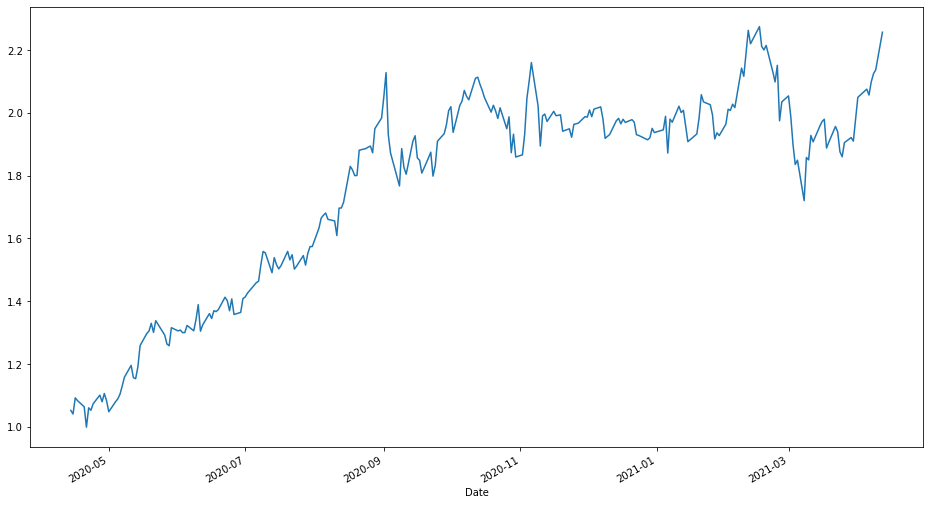

In [29]:
price_df['st_rtn'].plot(figsize=(16,9))

누적수익 : 1.134597778270396


<AxesSubplot:xlabel='Date'>

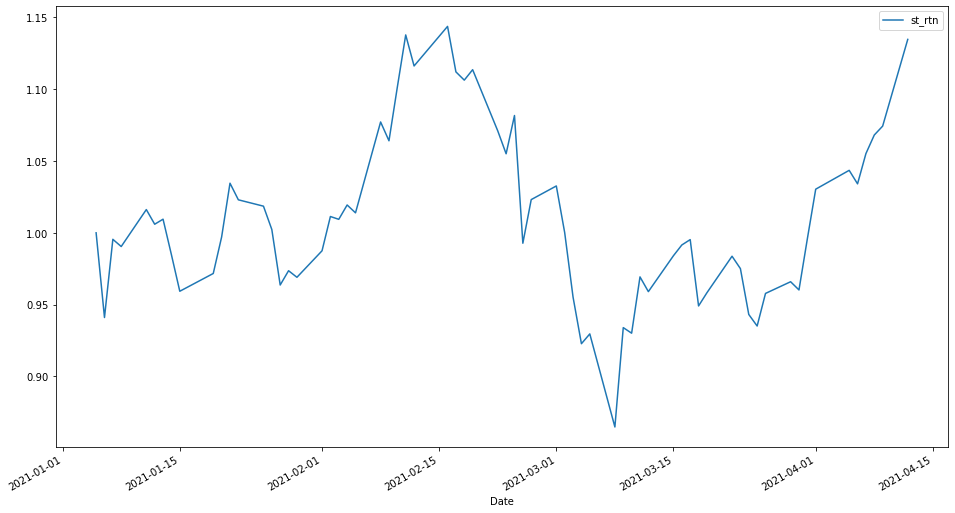

In [31]:
base_date = '2021-01-05'
tmp_df = price_df.loc[base_date:,['st_rtn']]/price_df.loc[base_date,['st_rtn']]
last_date = tmp_df.index[-1]
print("누적수익 :", tmp_df.loc[last_date,'st_rtn'])
tmp_df.plot(figsize=(16,9))

In [40]:
# CAGR 계산
CAGR = price_df.loc['2021-04-12','st_rtn']**(252./len(price_df.index))-1

1.2568078160457792

<AxesSubplot:xlabel='Date'>

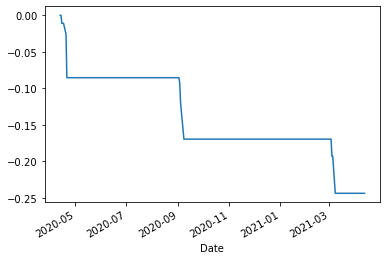

In [43]:
# 최대낙폭(MDD)
historical_max = price_df['Adj Close'].cummax()
daliy_drawdown = price_df['Adj Close'] / historical_max - 1.0
historical_dd = daliy_drawdown.cummin()
historical_dd.plot()

In [44]:
# 변동성 : 일별 단위변동성
VOL = np.std(price_df['daily_rtn'])*np.sqrt(252.)

In [45]:
# 샤프지수 : 사후적 샤프지수 (실현수익률 산술평균/실현수익률 변동성)
Sharpe = np.mean(price_df['daily_rtn']) / np.std(price_df['daily_rtn'])*np.sqrt(252.)

In [47]:
# 성과분석 결과
CAGR = price_df.loc['2021-04-12','st_rtn']**(252./len(price_df.index))-1
Sharpe = np.mean(price_df['daily_rtn']) / np.std(price_df['daily_rtn'])*np.sqrt(252.)
VOL = np.std(price_df['daily_rtn'])*np.sqrt(252.)
MDD = historical_dd.min()
print("CAGR : ", round(CAGR*100, 2), '%')
print("Sharpe : ", round(Sharpe, 2))
print("VOL : ", round(VOL*100, 2), '%')
print("MDD : ", round(-1*MDD*100, 2), '%')

CAGR :  125.68 %
Sharpe :  2.07
VOL :  44.3 %
MDD :  24.38 %
